In [80]:
import netCDF4 as nc
from matplotlib import pyplot as plt
plt.ion()
import numpy as np
from netcdftime import utime

In [81]:
fname = nc.Dataset('../data/icecharts-rasterized-svalbard_2016.nc')

In [82]:
dst_ma = fname['ice_concentration'][63::]
dst = np.where(dst_ma.mask==True, -1, dst_ma.data)

In [126]:
tsmp = fname['time']
cdftime = utime(tsmp.units)
timestamps = cdftime.num2date(tsmp[:])
print timestamps[63]
print tsmp[63]

2015-04-01 14:00:00.000006
1080741600


2015-03-20 14:00:00.000006


In [85]:
fastice_dst = np.where(dst==100, True, False)

In [88]:
def plot_nic(dst, outfile):
    plt.clf()
    plt.contour(dst, colors=['k'], levels=[-1], linestyles='solid')
    plt.contourf(dst, colors=['#e6f2ff', 'blue', 'green', 'yellow', 'orange', 'red', 'gray'], levels=np.unique(dst))
    plt.contourf(dst, colors=['white'], levels=[-1,-0.01])
    plt.text(200, 50, outfile,
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=25)
    plt.savefig('nic'+outfile)

In [89]:
def rle(inarray):
        """ run length encoding. Partial credit to R rle function. 
            Multi datatype arrays catered for including non Numpy
            returns: tuple (runlengths, startpositions, values) """
        ia = np.array(inarray)                  # force numpy
        n = len(ia)
        if n == 0: 
            return (None, None, None)
        else:
            y = np.array(ia[1:] != ia[:-1])     # pairwise unequal (string safe)
            i = np.append(np.where(y), n - 1)   # must include last element posi
            z = np.diff(np.append(-1, i))       # run lengths
            p = np.cumsum(np.append(0, z))[:-1] # positions
            return(z, p, ia[i])

In [109]:
pers = np.zeros(fastice_dst.shape[1::])
for i  in range(fastice_dst.shape[1]):
    for j in range(fastice_dst.shape[2]):
        o = rle(fastice_dst[:, i, j])
        try:
            pers[i,j] = o[0][o[2]][0]
        except:
            pass

In [110]:
a = [True, True, False, False, False, True]
o = rle(a)
print o[1][o[2]][0]

0


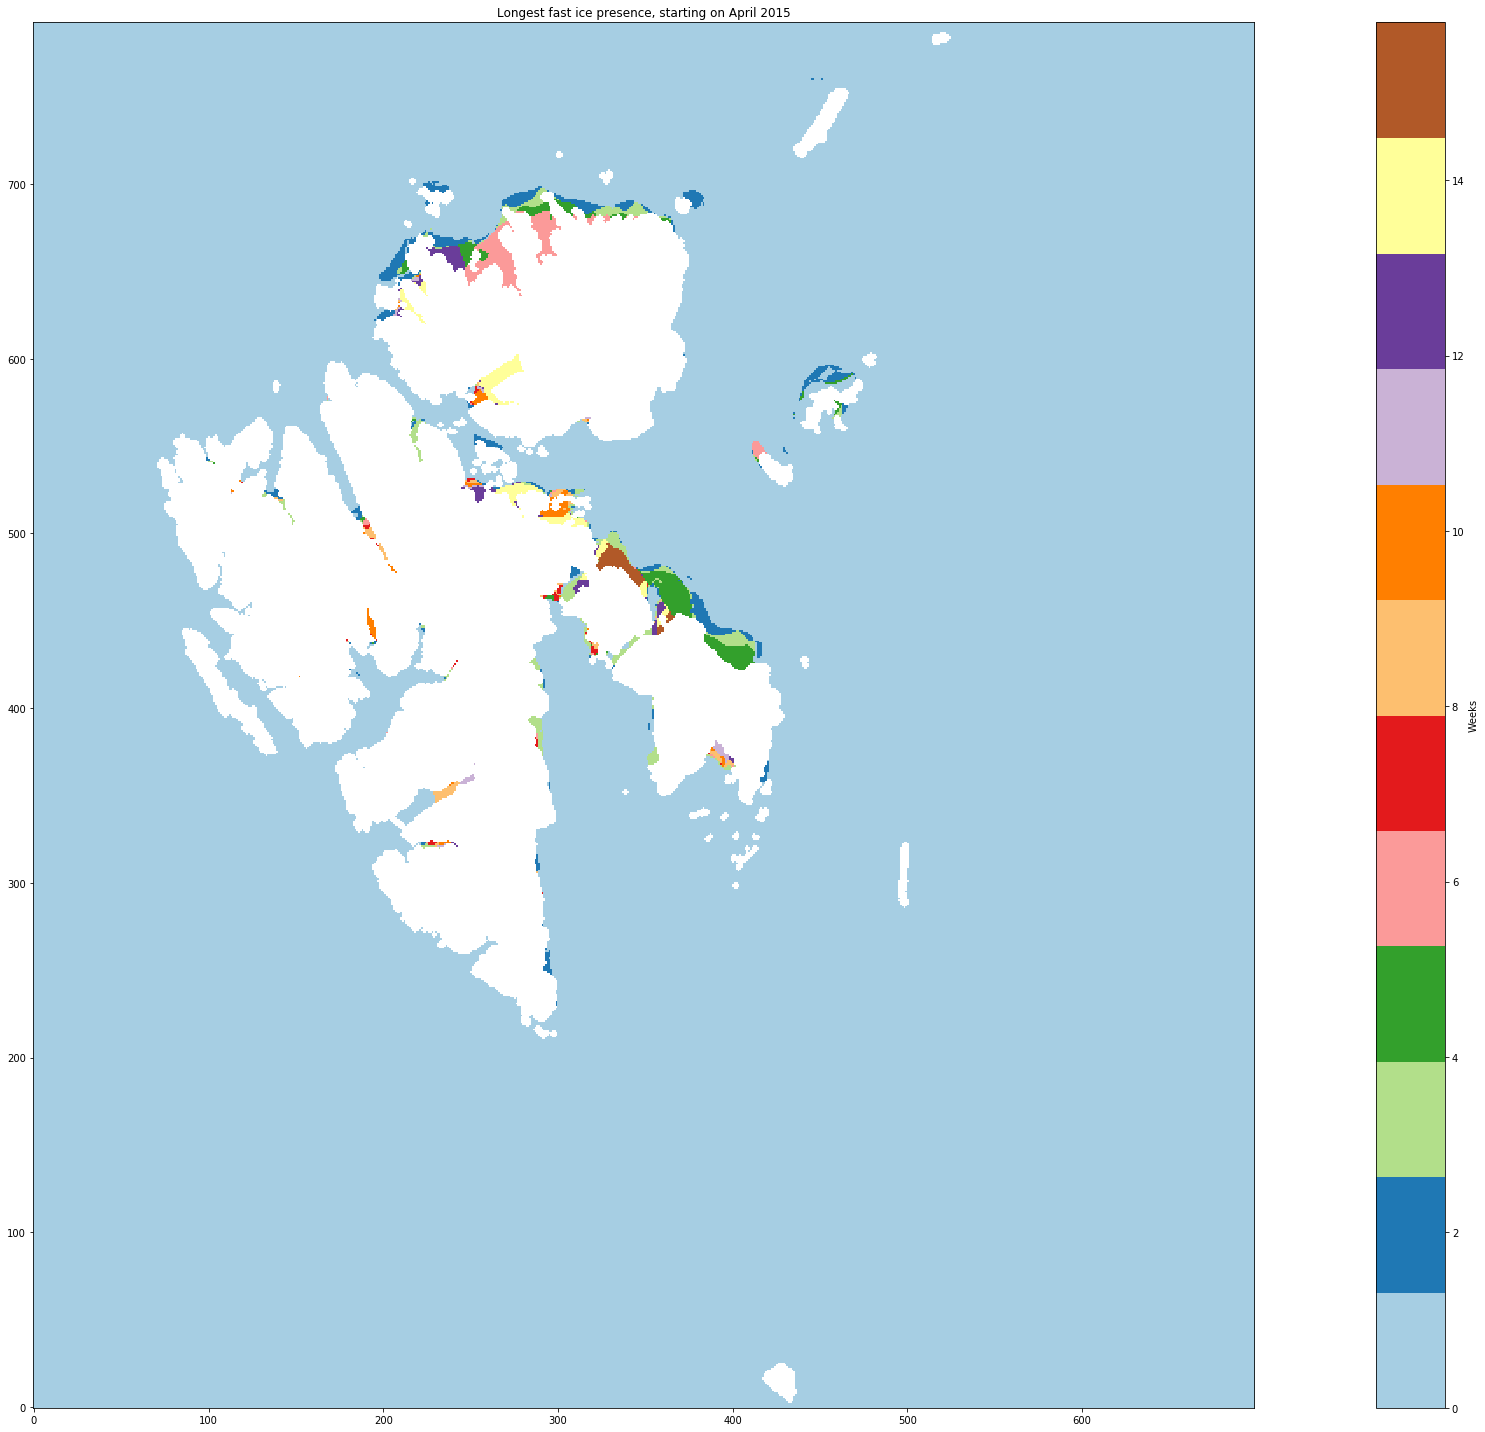

In [114]:
fig = plt.figure(figsize=( 20*1.7, 20))
plt.imshow(np.ma.array(pers/5, mask=dst_ma.mask[0,:,:]), cmap='Paired', origin='lower')
cb = plt.colorbar(orientation='vertical')
cb.set_label('Weeks')
plt.title('Longest fast ice presence, starting on April 2015')
plt.tight_layout()